### Integrates de Grupo:
* GRECIA MARTINEZ 
* MAIRA PACHECO 
* ALESSANDRO CORONADO 

# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Entendimiento del Negocio](#Entendimiento-de-los-Datos)  
3. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
4. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)
5. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
6. [Analisis de Datos](#Analisis-de-Datos)
7. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
8. [Construccion-del-Modelo](#Model-Building)
9. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# 1. Introduccion 

El mercado inmobiliario es un sector de inversión crucial en el mundo de los negocios, con oportunidades y desafíos únicos en cada región. En este contexto, Surprise Housing, una exitosa empresa de vivienda con sede en Estados Unidos, se embarca en un emocionante nuevo proyecto: la expansión hacia el mercado australiano. Esta empresa se destaca por su capacidad para utilizar datos y análisis avanzados para tomar decisiones estratégicas en la compra y venta de propiedades. Ahora, se enfrenta al desafío de aplicar su experiencia en un nuevo entorno.

El propósito de este proyecto es claro: comprender y aprovechar el mercado inmobiliario australiano mediante la creación de un modelo de regresión avanzado que prediga los valores reales de las propiedades. A través del uso de técnicas de regularización, como Ridge, Lasso y Elastic Net, se busca identificar las variables clave que influyen en los precios de las casas en Australia y determinar cuán efectivamente estas variables describen esas variaciones de precios.

Los objetivos principales de este proyecto son los siguientes:

Identificar las variables más influyentes en la predicción de los precios de las viviendas en el mercado australiano.

Evaluar la capacidad de estas variables para explicar y prever las fluctuaciones en los precios de las propiedades en Australia.


El resultado de este proyecto no solo beneficiará directamente a Surprise Housing en su toma de decisiones de inversión en Australia, sino que también proporcionará una valiosa comprensión de la dinámica de precios en este mercado emergente. Esta información será esencial para la formulación de estrategias comerciales sólidas y el éxito continuo de la empresa en su expansión internacional.

En resumen, este proyecto representa un paso estratégico en la evolución de Surprise Housing, al aprovechar su experiencia en análisis de datos y modelos avanzados para comprender y conquistar un nuevo y prometedor mercado inmobiliario en Australia.



# 2. Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# 3. Configuracion e Instalacion

In [397]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import sys

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format 

import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

from  funciones_cyan import *

In [398]:
# Leer el DATASET CSV con en un Dataframe.
DATA_FILE_PATH = '_data/dataset.csv'
raw_data = pd.read_csv(DATA_FILE_PATH)

# 4.  Entendimiento de los Datos

A continuación se hace una observación inicial de algunas características de los datos que se tienen originalmente.
Tenemos 1460 observaciones, 81 variables (entre numéricas y categóricas) que describen las características de diferentes inmuebles.

In [399]:
df=raw_data
informacion_df(df, "Columnas")

Numero de filas:  1460
Numero de columnas:  81
+---------------+----------------+---------------+---------+--------+--------------+-----------------------+
|    Columnas   | Valores unicos | Valores Nulos |   Moda  | Moda % | Tipo de Dato |        Valores        |
+---------------+----------------+---------------+---------+--------+--------------+-----------------------+
|    1stFlrSF   |      753       |      0.0%     |   864   |  1.7%  |    int64     |      [ 856 1262]      |
|    2ndFlrSF   |      417       |      0.0%     |    0    | 56.8%  |    int64     |       [854   0]       |
|   3SsnPorch   |       20       |      0.0%     |    0    | 98.4%  |    int64     |       [  0 320]       |
|     Alley     |       3        |     93.8%     |   Grvl  |  3.4%  |    object    |      [nan 'Grvl']     |
|  BedroomAbvGr |       8        |      0.0%     |    3    | 55.1%  |    int64     |         [3 4]         |
|    BldgType   |       5        |      0.0%     |   1Fam  | 83.6%  |    object  

Tamaño del Conjunto de Datos: Tenemos un conjunto de datos bastante grande con 1,460 filas y 81 columnas, lo que proporciona una cantidad sustancial de información para el análisis.

Diversidad de Valores Únicos: Al observar la cantidad de valores únicos en cada columna, es evidente que algunas características tienen una amplia variedad de opciones, como "Neighborhood" con 25 valores únicos, mientras que otras son más limitadas en sus opciones, como "Street" con solo 2 valores únicos. Esto indica que se deberá trabajar con una mezcla de datos categóricos y numéricos.

Valores Nulos: La mayoría de las columnas no tienen valores nulos, sin embargo, hay algunas columnas con valores nulos, como "GarageYrBlt" y "LotFrontage".

Moda: En algunas columnas, la moda (valor más común) puede ser un indicador importante. Por ejemplo, en "CentralAir," "Y" (sí) es la moda, lo que sugiere que la mayoría de las casas tienen aire acondicionado.

Tipo de Datos: El conjunto de datos contiene principalmente tipos de datos enteros (int64) y algunos flotantes (float64). Los datos categóricos se almacenan como objetos (object).

Observaciones Especiales: Algunas columnas, como "PoolQC", "MiscFeature," "Fence" y "Alley" tienen un alto porcentaje de valores nulos, lo que sugiere que estas características podrían no estar disponibles para la mayoría de las propiedades.

En resumen, los datos parecen ser diversos en términos de tipos de características y valores únicos. La calidad de los datos en términos de valores nulos es razonable. En general, tienes un conjunto de datos sólido para llevar a cabo un análisis en profundidad y construir modelos predictivos.

In [494]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
count,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,...,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00,1232.00
mean,55.58,67.78,9182.68,5.97,5.60,1970.06,1984.09,74.47,409.08,556.16,...,2.86,6.38,0.55,1977.61,1.71,455.07,88.09,37.04,2007.82,168891.40
std,40.63,15.47,2989.33,1.29,1.11,30.32,20.93,119.58,398.90,425.73,...,0.78,1.48,0.62,24.18,0.73,199.99,116.52,47.98,1.34,60068.62
min,20.00,24.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,2006.00,35311.00
25%,20.00,60.00,7418.75,5.00,5.00,1950.75,1965.00,0.00,0.00,218.00,...,2.00,5.00,0.00,1961.00,1.00,308.00,0.00,0.00,2007.00,128425.00
50%,50.00,70.05,9127.50,6.00,5.00,1972.00,1993.00,0.00,372.50,475.00,...,3.00,6.00,0.00,1978.00,2.00,464.50,0.00,20.00,2008.00,155950.00
75%,70.00,76.00,10950.50,7.00,6.00,2000.00,2003.00,128.00,680.00,796.25,...,3.00,7.00,1.00,2000.00,2.00,572.00,164.00,60.00,2009.00,198150.00
max,190.00,116.00,18890.00,10.00,9.00,2009.00,2010.00,491.00,1619.00,2046.00,...,6.00,12.00,3.00,2010.00,4.00,1390.00,736.00,204.00,2010.00,378500.00


Revisamos las columnas que contienen mas del 80% de nulos. Algunas posibles estrategias son: eliminar aquellas que tienen demasiados valores faltantes o realizar transformaciones.

In [400]:
informacion_df(df[getc_nulas(df,0.8)], "Valores Nulos")

Numero de filas:  1460
Numero de columnas:  4
+-------------+----------------+---------------+-------+--------+--------------+---------------+
|   Columnas  | Valores unicos | Valores Nulos |  Moda | Moda % | Tipo de Dato |    Valores    |
+-------------+----------------+---------------+-------+--------+--------------+---------------+
|    Fence    |       5        |     80.8%     | MnPrv | 10.8%  |    object    | [nan 'MnPrv'] |
|    Alley    |       3        |     93.8%     |  Grvl |  3.4%  |    object    |  [nan 'Grvl'] |
| MiscFeature |       5        |     96.3%     |  Shed |  3.4%  |    object    |  [nan 'Shed'] |
|    PoolQC   |       4        |     99.5%     |   Gd  |  0.2%  |    object    |   [nan 'Ex']  |
+-------------+----------------+---------------+-------+--------+--------------+---------------+


Revisamos las columnas que tienen sus valores muy concentrados en un solo valor, también conocidas como variables de poca varianza. Si bien se puede considerar eliminar estas variables o transformarlas, los modelos de regularización que aplicaremos al final ayudaran a reducir el ruido que generan en el modelo.

In [401]:
informacion_df(df[getc_saturadas(df,0.8)],"Moda %")

Numero de filas:  1460
Numero de columnas:  29
+---------------+----------------+---------------+---------+--------+--------------+-----------------------+
|    Columnas   | Valores unicos | Valores Nulos |   Moda  | Moda % | Tipo de Dato |        Valores        |
+---------------+----------------+---------------+---------+--------+--------------+-----------------------+
| SaleCondition |       6        |      0.0%     |  Normal | 82.1%  |    object    |  ['Normal' 'Abnorml'] |
|    BldgType   |       5        |      0.0%     |   1Fam  | 83.6%  |    object    |   ['1Fam' '2fmCon']   |
| EnclosedPorch |      120       |      0.0%     |    0    | 85.8%  |    int64     |       [  0 272]       |
|  BsmtFinType2 |       7        |      2.6%     |   Unf   | 86.0%  |    object    |     ['Unf' 'BLQ']     |
|   Condition1  |       9        |      0.0%     |   Norm  | 86.3%  |    object    |    ['Norm' 'Feedr']   |
|    SaleType   |       9        |      0.0%     |    WD   | 86.8%  |    object  

Una posible opción para tratar con estos valores es realizar transformaciones:
- SaleCondition: Se transforma en una variable binaria (Normal y Abnorml)
- BldgType: Se transforma en una variable binaria (1Fam y Other)
- EnclosedPorch: Se transforma en una variable binaria (Yes y No)
- BsmtFinType2: Se transforma en 3 categorias (Finished, Unfinished, No Basement)

# 5. Manipulación y limpieza de datos

### 1. Limpieza de Datos y Análisis de Datos Faltantes.

Eliminamos las variables con mas de 80% de registros faltantes. La eliminación de variables con muchos registros faltantes es una estrategia común en el preprocesamiento de datos cuando se trabaja con conjuntos de datos que contienen columnas con una gran cantidad de valores nulos. Esta decisión se tomará a fin de somplificar el conjunto de datos y reducir la complejidad, ya que las columnas con una gran cantidad de valores nulos pueden no aportar información útil o significativa al análisis o al modelo de aprendizaje automático.

In [402]:
informacion_df(df[getc_nulas(df,0.8)])

Numero de filas:  1460
Numero de columnas:  4
+-------------+----------------+---------------+-------+--------+--------------+---------------+
|   Columnas  | Valores unicos | Valores Nulos |  Moda | Moda % | Tipo de Dato |    Valores    |
+-------------+----------------+---------------+-------+--------+--------------+---------------+
|    Alley    |       3        |     93.8%     |  Grvl |  3.4%  |    object    |  [nan 'Grvl'] |
|    Fence    |       5        |     80.8%     | MnPrv | 10.8%  |    object    | [nan 'MnPrv'] |
| MiscFeature |       5        |     96.3%     |  Shed |  3.4%  |    object    |  [nan 'Shed'] |
|    PoolQC   |       4        |     99.5%     |   Gd  |  0.2%  |    object    |   [nan 'Ex']  |
+-------------+----------------+---------------+-------+--------+--------------+---------------+


In [403]:
#df.Fence=df.Fence.fillna('No Fence')
#df.Alley=df.Alley.fillna('No alley access')
#df.MiscFeature=df.MiscFeature.fillna('None')
#df.PoolQC=df.PoolQC.fillna('No Pool')

df=df.drop(getc_nulas(df,0.8), axis=1)

Para las variables categoricas con datos faltantes como:
    Garage, Bsmt y FireplaceQu se pone la etiqueta 'NA' que significa que no tiene tal caracteristica.


In [404]:
columnas_garage= [col for col in df.columns if "Garage" in col or "garage" in col]
columnas_bsmt= ['BsmtCond' ,'BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']
columnas=columnas_garage+['FireplaceQu','MasVnrType']+columnas_bsmt
informacion_df(df[columnas])

Numero de filas:  1460
Numero de columnas:  14
+--------------+----------------+---------------+--------+--------+--------------+---------------------+
|   Columnas   | Valores unicos | Valores Nulos |  Moda  | Moda % | Tipo de Dato |       Valores       |
+--------------+----------------+---------------+--------+--------+--------------+---------------------+
|  GarageArea  |      441       |      0.0%     |   0    |  5.5%  |    int64     |      [548 460]      |
|  GarageCars  |       5        |      0.0%     |   2    | 56.4%  |    int64     |        [2 3]        |
| GarageYrBlt  |       98       |      5.5%     | 2005.0 |  4.5%  |   float64    |    [2003. 1976.]    |
|   BsmtCond   |       5        |      2.5%     |   TA   | 89.8%  |    object    |     ['TA' 'Gd']     |
| BsmtExposure |       5        |      2.6%     |   No   | 65.3%  |    object    |     ['No' 'Gd']     |
| BsmtFinType1 |       7        |      2.5%     |  Unf   | 29.5%  |    object    |    ['GLQ' 'ALQ']    |
| BsmtFi

In [405]:
for col in columnas:
    df[col]=df[col].fillna('NA')

df['MasVnrType']=df['MasVnrType'].fillna('None')

Para la columna numerica LotFrontage y GarageYrBlt imputamos la media a los valores faltantes

In [406]:
# Calcular la media de la columna "LotFrontage" (excluyendo los valores faltantes)
media = df['LotFrontage'].mean()
# Rellenar los valores faltantes en la columna "LotFrontage" con la media
df['LotFrontage'].fillna(media, inplace=True)

In [407]:
# Calcular la media de la columna "LotFrontage" (excluyendo los valores faltantes)
valores_a_convertir = ["NA"]  # Puedes agregar más valores a esta lista si es necesario
df["GarageYrBlt"].replace(valores_a_convertir, np.nan, inplace=True)
media = df['GarageYrBlt'].mean()
# Rellenar los valores faltantes en la columna "LotFrontage" con la media
df['GarageYrBlt'].fillna(media, inplace=True)
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)

Para la columna Electrical imputamos la moda al unico valor faltante que tiene

In [408]:
# Calcular la moda de la columna "Electrical" (valor más común)
moda_electrical = df['Electrical'].mode()[0]  # Usamos [0] para obtener el primer valor de la moda

# Rellenar los valores faltantes en la columna "Electrical" con la moda
df['Electrical'].fillna(moda_electrical, inplace=True)

Si bien estan en formato numerico algunas columnas son categoricas. Se ha creado un diccionario de mapeo llamado "month_map" que asocia los números del 1 al 12 con los nombres de los meses correspondientes. Esto se hace para cambiar los valores numéricos en la columna "MoSold" (que representa el mes de venta) por sus equivalentes en formato de texto (nombre de los meses). El propósito de esta transformación es facilitar la interpretación de los datos y obtener información sobre las ventas por meses de una manera más comprensible. Por ejemplo, en lugar de ver "1" en la columna "MoSold", ahora se verá "Enero", lo que brinda una mejor idea de cuándo ocurrieron las ventas. Esta transformación ayuda en el análisis y la interpretación de los datos relacionados con las ventas por meses.

In [409]:
# Diccionario de mapeo
month_map = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    0: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre',
    #... puedes agregar más mapeos si lo necesitas
}

# Cambiar los valores usando map
df['MoSold'] = df['MoSold'].map(month_map)

Columnas de baja varianza y redundantes

In [410]:
redundantes=['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtHalfBath','LowQualFinSF','BsmtFinSF2','Id']
informacion_df(df[redundantes])
df=df.drop(redundantes, axis=1)

Numero de filas:  1460
Numero de columnas:  9
+---------------+----------------+---------------+------+--------+--------------+-----------+
|    Columnas   | Valores unicos | Valores Nulos | Moda | Moda % | Tipo de Dato |  Valores  |
+---------------+----------------+---------------+------+--------+--------------+-----------+
|   3SsnPorch   |       20       |      0.0%     |  0   | 98.4%  |    int64     | [  0 320] |
|   BsmtFinSF2  |      144       |      0.0%     |  0   | 88.6%  |    int64     |  [ 0 32]  |
|  BsmtHalfBath |       3        |      0.0%     |  0   | 94.4%  |    int64     |   [0 1]   |
| EnclosedPorch |      120       |      0.0%     |  0   | 85.8%  |    int64     | [  0 272] |
|       Id      |      1460      |      0.0%     |  1   |  0.1%  |    int64     |   [1 2]   |
|  LowQualFinSF |       24       |      0.0%     |  0   | 98.2%  |    int64     | [  0 360] |
|    MiscVal    |       21       |      0.0%     |  0   | 96.4%  |    int64     | [  0 700] |
|    PoolArea 

Para el caso de categoricas que contienen mas de 99% de un solo valor, las eliminamos

In [411]:
df=df.drop(getc_saturadas(df,0.90), axis=1)

In [412]:
informacion_df(df)

Numero de filas:  1460
Numero de columnas:  56
+---------------+----------------+---------------+-------------------+--------+--------------+-----------------------+
|    Columnas   | Valores unicos | Valores Nulos |        Moda       | Moda % | Tipo de Dato |        Valores        |
+---------------+----------------+---------------+-------------------+--------+--------------+-----------------------+
|  GarageYrBlt  |       97       |      0.0%     |        1978       |  6.8%  |    int32     |      [2003 1976]      |
|    1stFlrSF   |      753       |      0.0%     |        864        |  1.7%  |    int64     |      [ 856 1262]      |
|    2ndFlrSF   |      417       |      0.0%     |         0         | 56.8%  |    int64     |       [854   0]       |
|  BedroomAbvGr |       8        |      0.0%     |         3         | 55.1%  |    int64     |         [3 4]         |
|   BsmtFinSF1  |      637       |      0.0%     |         0         | 32.0%  |    int64     |       [706 978]       |
|

###### Revisar desde aqui

In [413]:
informacion_df(df[getc_saturadas(df,0.8)], "Moda %")

Numero de filas:  1460
Numero de columnas:  9
+---------------+----------------+---------------+--------+--------+--------------+----------------------+
|    Columnas   | Valores unicos | Valores Nulos |  Moda  | Moda % | Tipo de Dato |       Valores        |
+---------------+----------------+---------------+--------+--------+--------------+----------------------+
| SaleCondition |       6        |      0.0%     | Normal | 82.1%  |    object    | ['Normal' 'Abnorml'] |
|    BldgType   |       5        |      0.0%     |  1Fam  | 83.6%  |    object    |  ['1Fam' '2fmCon']   |
|  BsmtFinType2 |       7        |      0.0%     |  Unf   | 86.0%  |    object    |    ['Unf' 'BLQ']     |
|   Condition1  |       9        |      0.0%     |  Norm  | 86.3%  |    object    |   ['Norm' 'Feedr']   |
|    SaleType   |       9        |      0.0%     |   WD   | 86.8%  |    object    |     ['WD' 'New']     |
|   ExterCond   |       5        |      0.0%     |   TA   | 87.8%  |    object    |     ['TA' 'Gd'

In [414]:
busca_y_muestra_lineas('data_description.txt', 'PoolArea:', 10)

Texto encontrado en la línea 470. Mostrando las siguientes 10 líneas:

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality

----------------------------------------


### 2. Análisis y Tratamiento de Valores Atípicos.

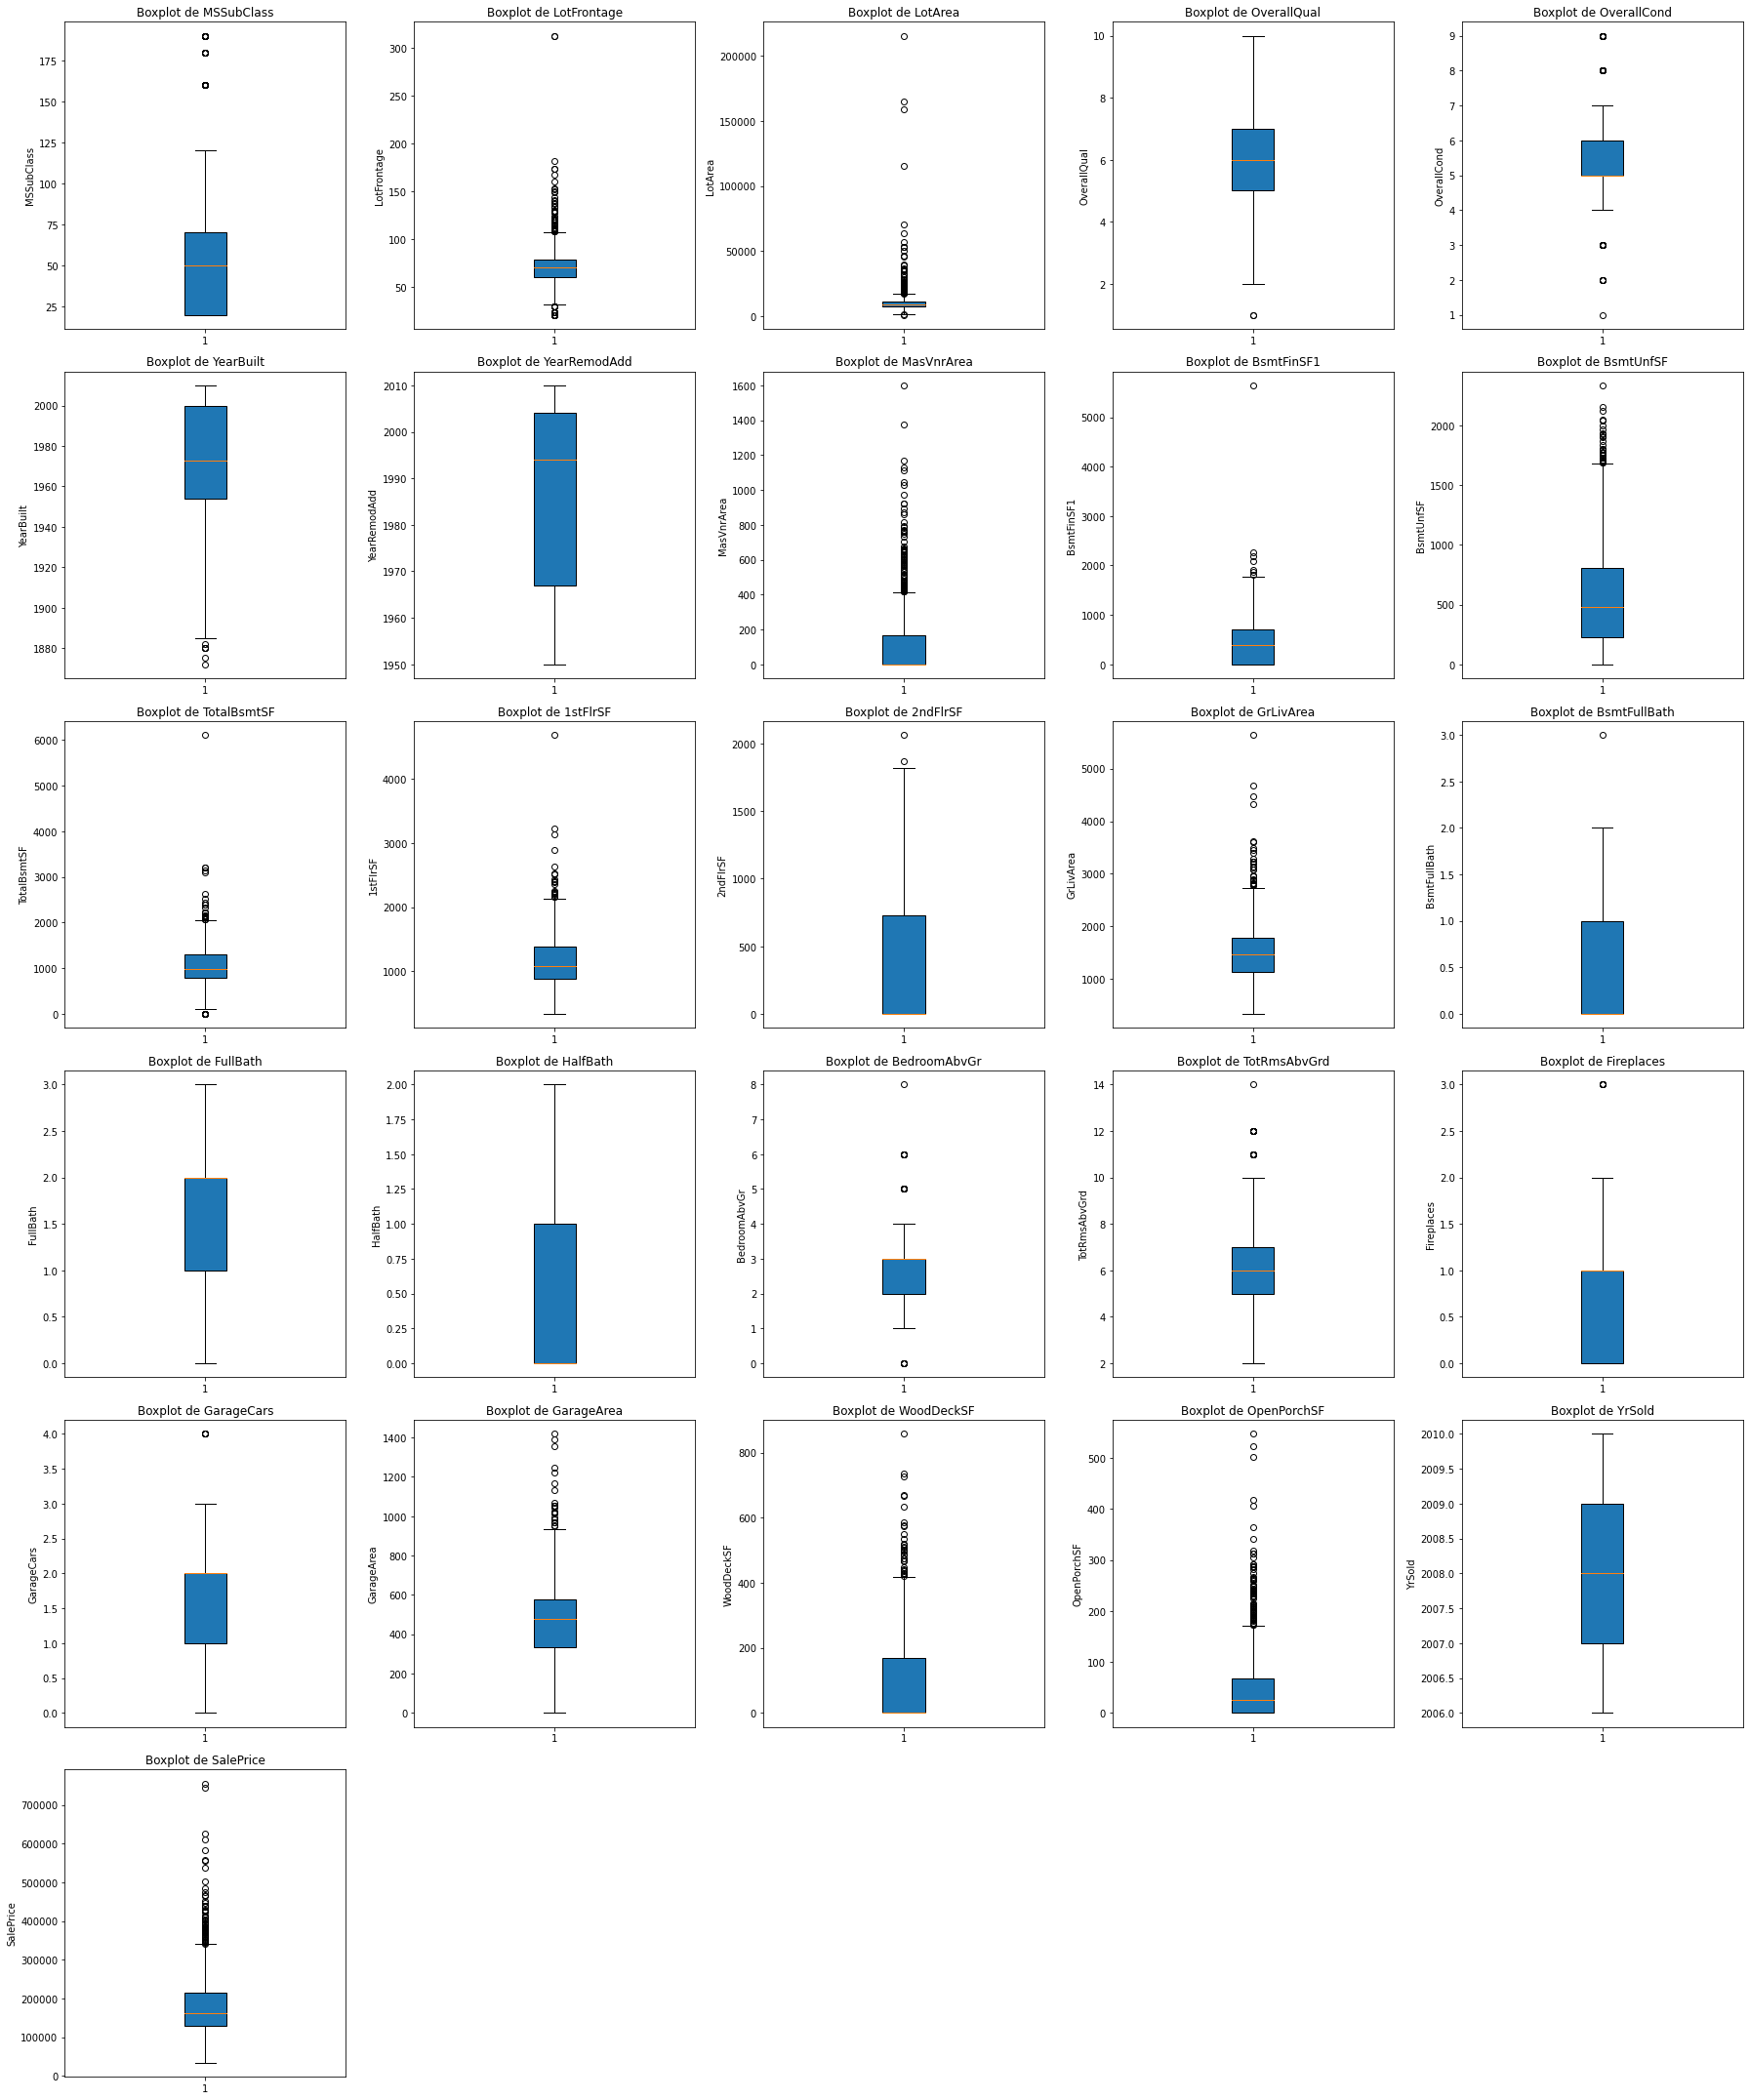

In [415]:
columnas = [elem for elem in df.columns if elem not in getc_saturadas(df,0.9)]
gboxplot(df[columnas], getc_numericas(df[columnas]),5)

En el gráfico anterior se analizo las cajas y la variabilidad y los valores atípicos para identificar que tipo de procedimiento de tratado de valores atipicos podriamos tratar. De esa manera ayudarnos a ver las variables que contiene mas sesgo para el modelo.

Tomamos solo las columnas numericas que no sean de baja variablidad y graficamos sus boxplots. Observamos que algunas de ellas contienen valores atipicos. A continuación se muestra el grafico solo de estas:

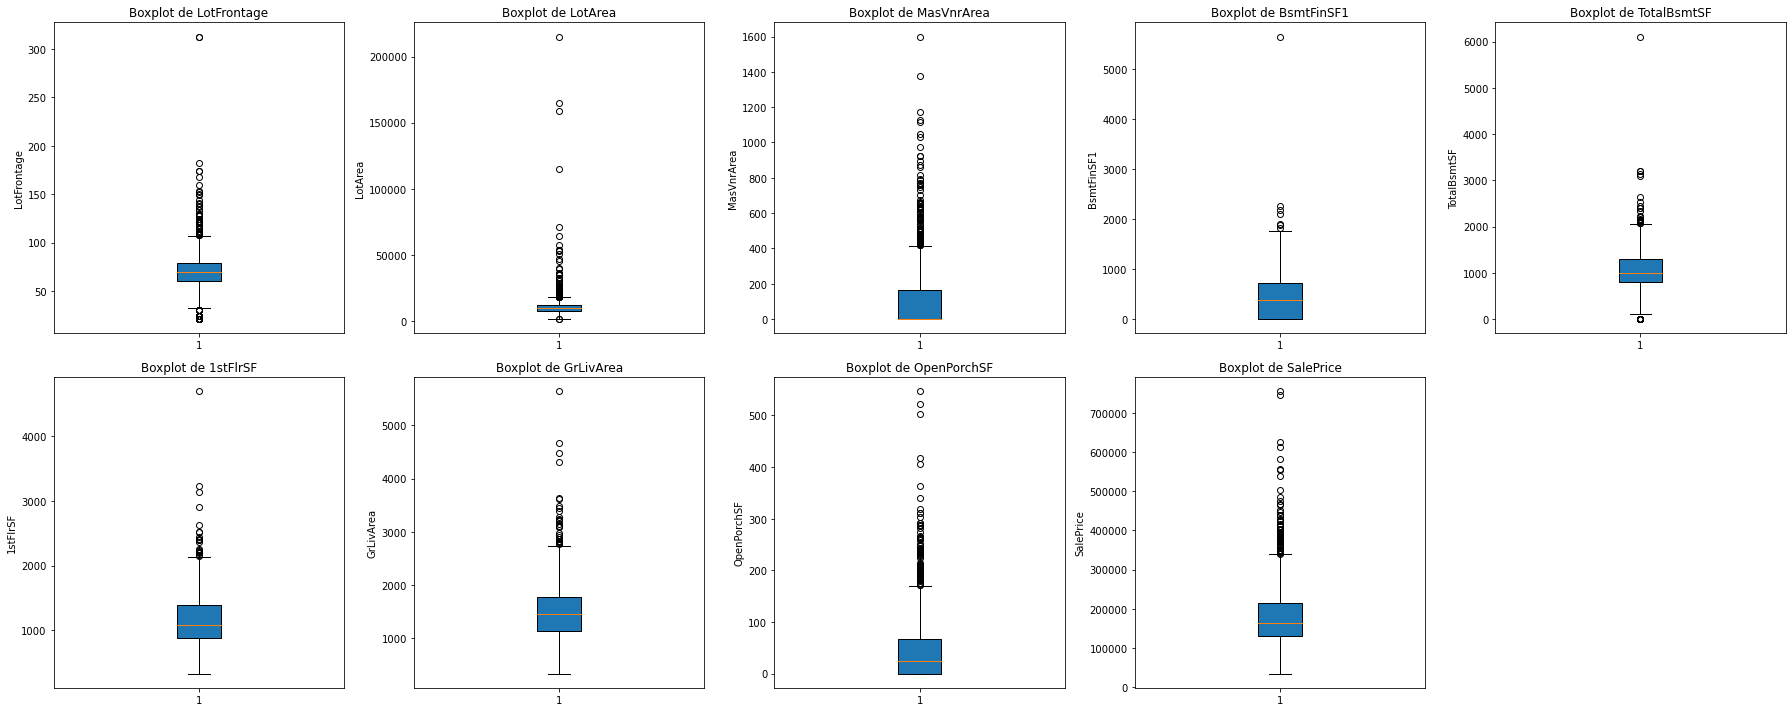

In [416]:
columnas=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1'
,'TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF'
,'SalePrice']
gboxplot(df[columnas], getc_numericas(df[columnas]),5)


Se calcula el rango intercuantilico y se eliminan los outliers que esten a 2 IQR de  los percentiles 25 y 75

In [417]:
# Función para obtener máscaras booleanas de los outliers
def get_outlier_mask(df, column):
    # Calcular el rango intercuartil (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites para valores atípicos
    lower_limit = Q1 - 2 * IQR
    upper_limit = Q3 + 2 * IQR
    
    # Devolver máscara booleana donde 'True' indica un outlier
    return ~((df[column] >= lower_limit) & (df[column] <= upper_limit))

# Crear una máscara general donde 'True' indica un outlier en alguna columna
general_mask = pd.Series(False, index=df.index)

for col in columnas:
    general_mask = general_mask | get_outlier_mask(df, col)

# Filtrar los registros que NO son outliers
df= df[~general_mask]

# Mostrar resultados
print(f"New shape: {df.shape}")


New shape: (1232, 56)


El IQR mide la dispersión de los datos y es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Al establecer un límite de 2 veces el IQR por debajo de Q1 y por encima de Q3, estamos esencialmente definiendo un rango en el cual esperamos que se encuentre la mayoría de los datos, basándonos en la distribución de los datos observados.

El factor "2" en ±2× IQR es una elección común, pero no es la única posible. Algunas fuentes utilizan 1.5 en lugar de 2, lo que da un rango más estricto para la detección de valores atípicos depende la agresividad para ajustar los datos atipicos.

# 6. Analisis de datos

### 4. Análisis Univariable.

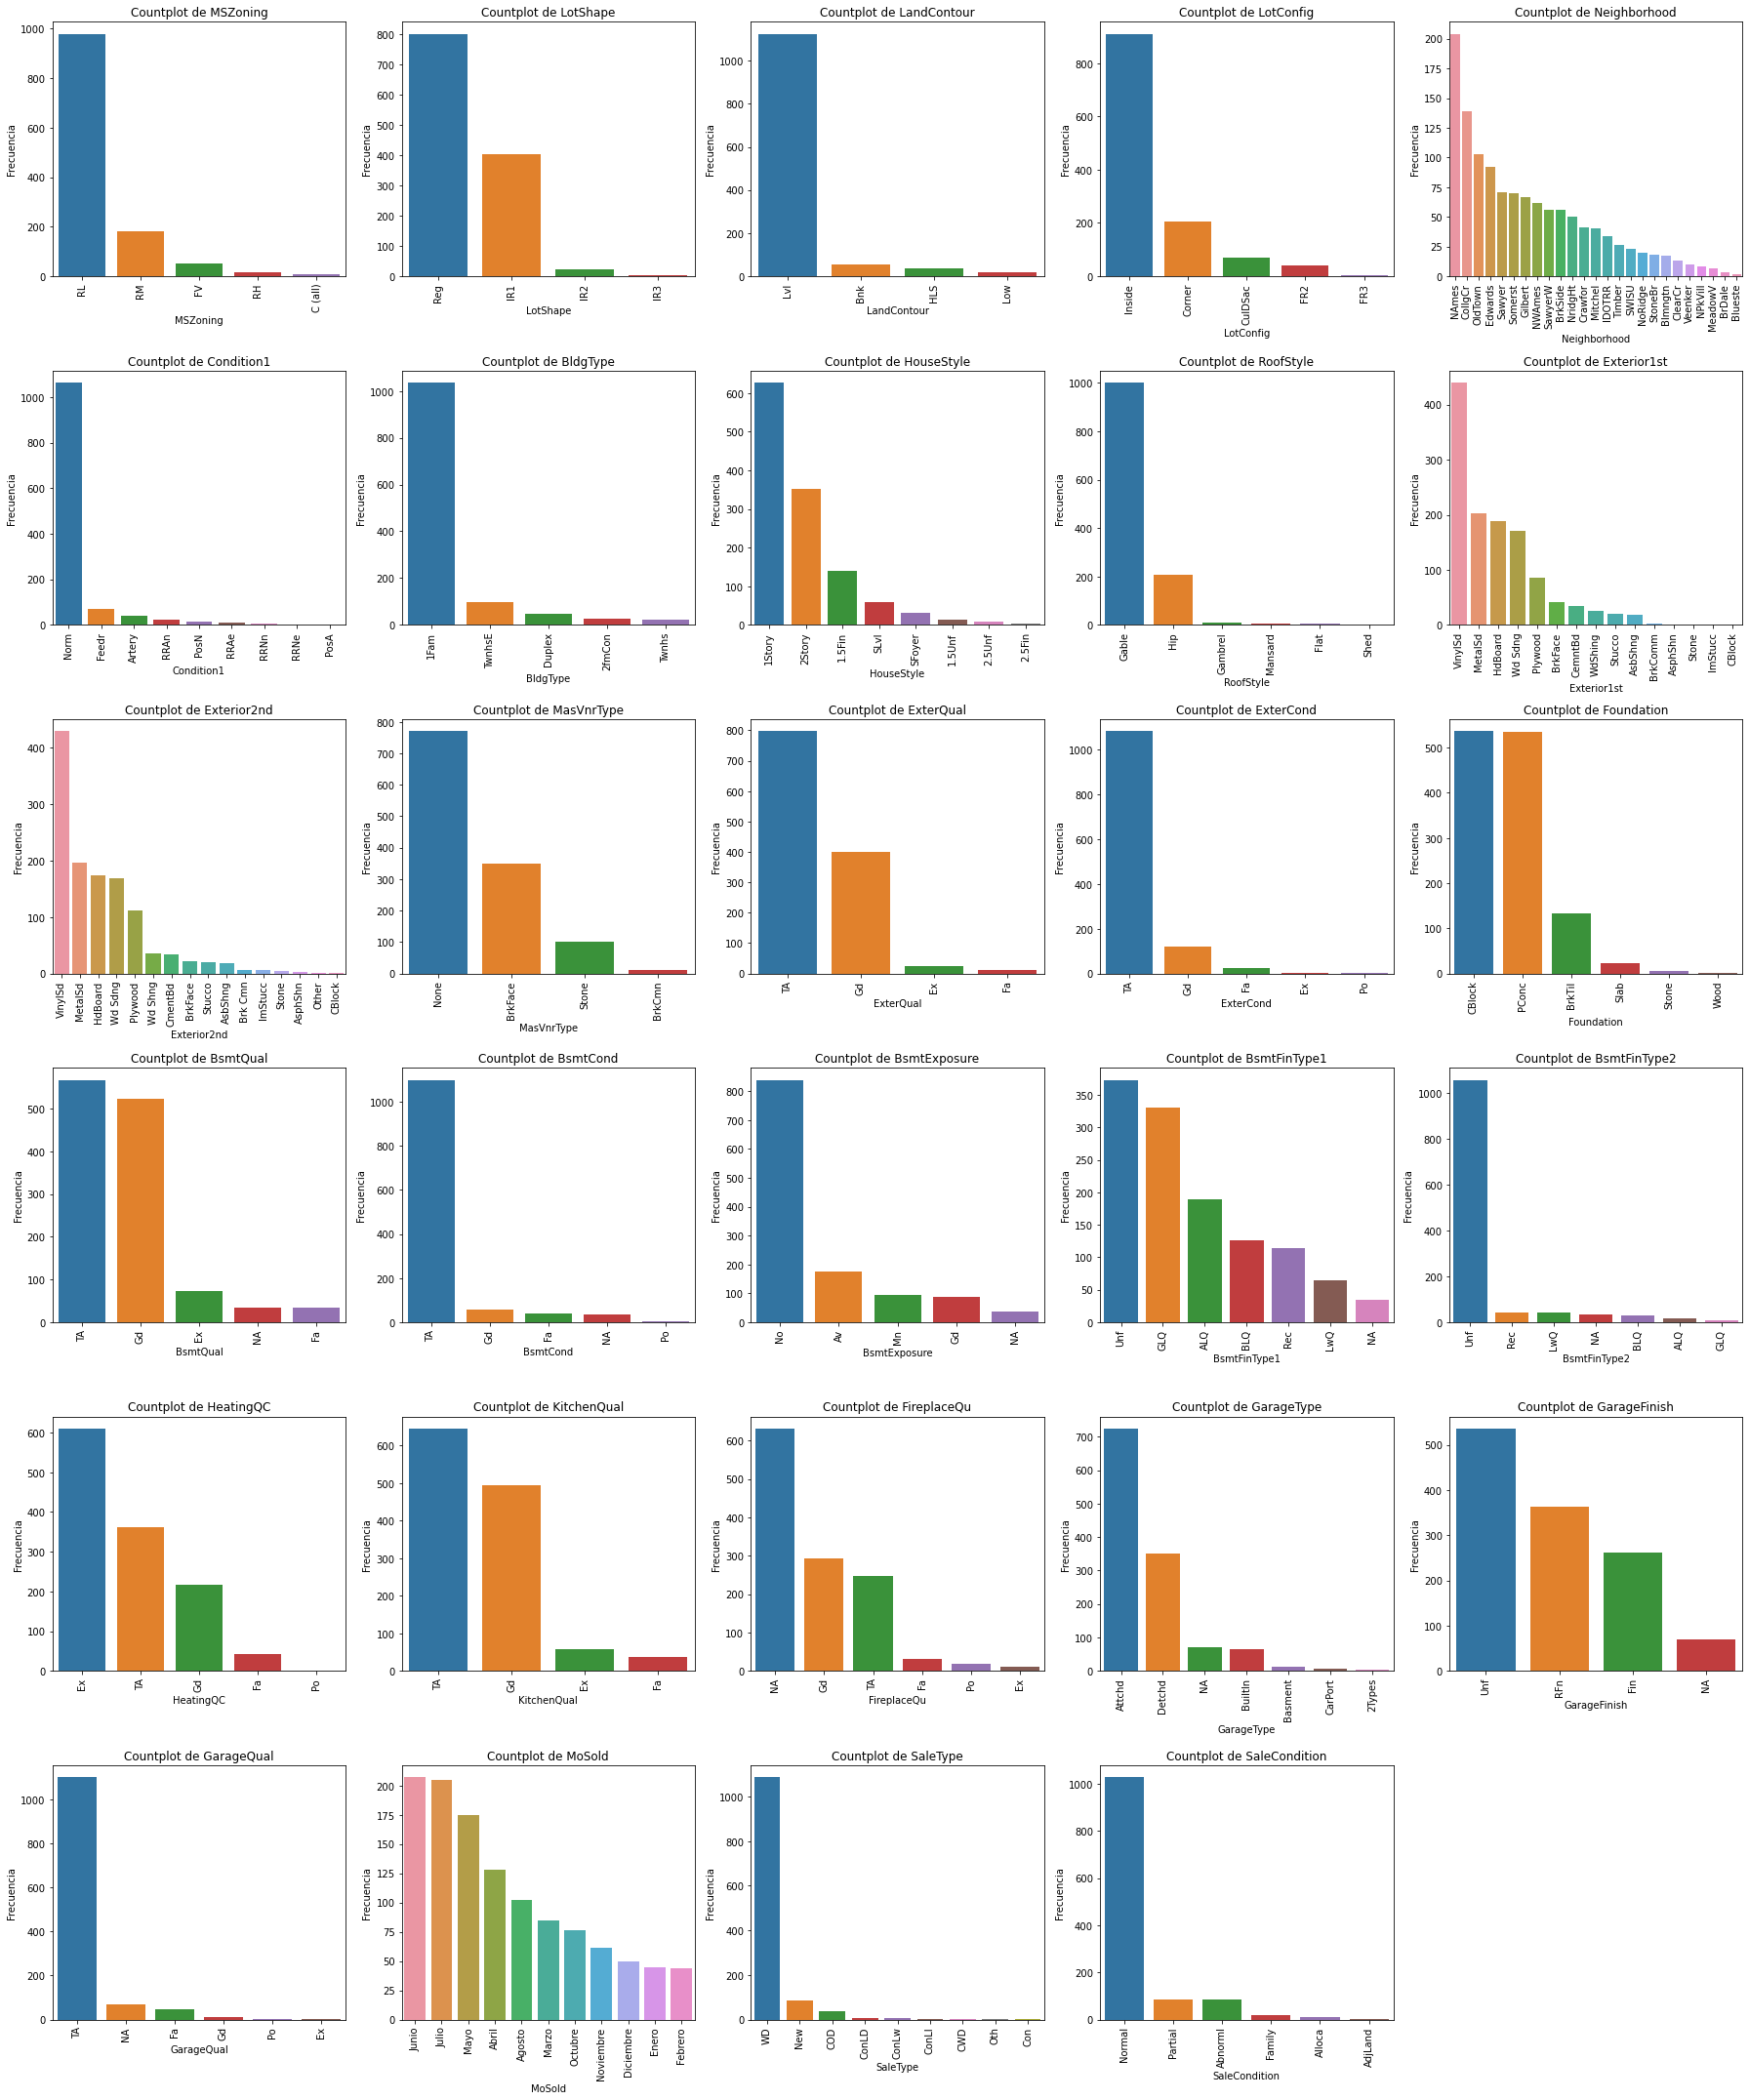

In [418]:
gbarras(df,getc_cadenas(df),5)

En el grafico podemos analizar variables interesantes que pueden llegar a aportar mucho al modelo como la variable de MoSold que seria el Mes de venta de la casa otra variable que resalta bastante es la del barrio o Neighnorhood que viendolo de manera que resalta cierto potencial de aporte al modelo por la variedad de valores y cantidad de la variable y tener una distribuccion bastante porcentual y representativa.

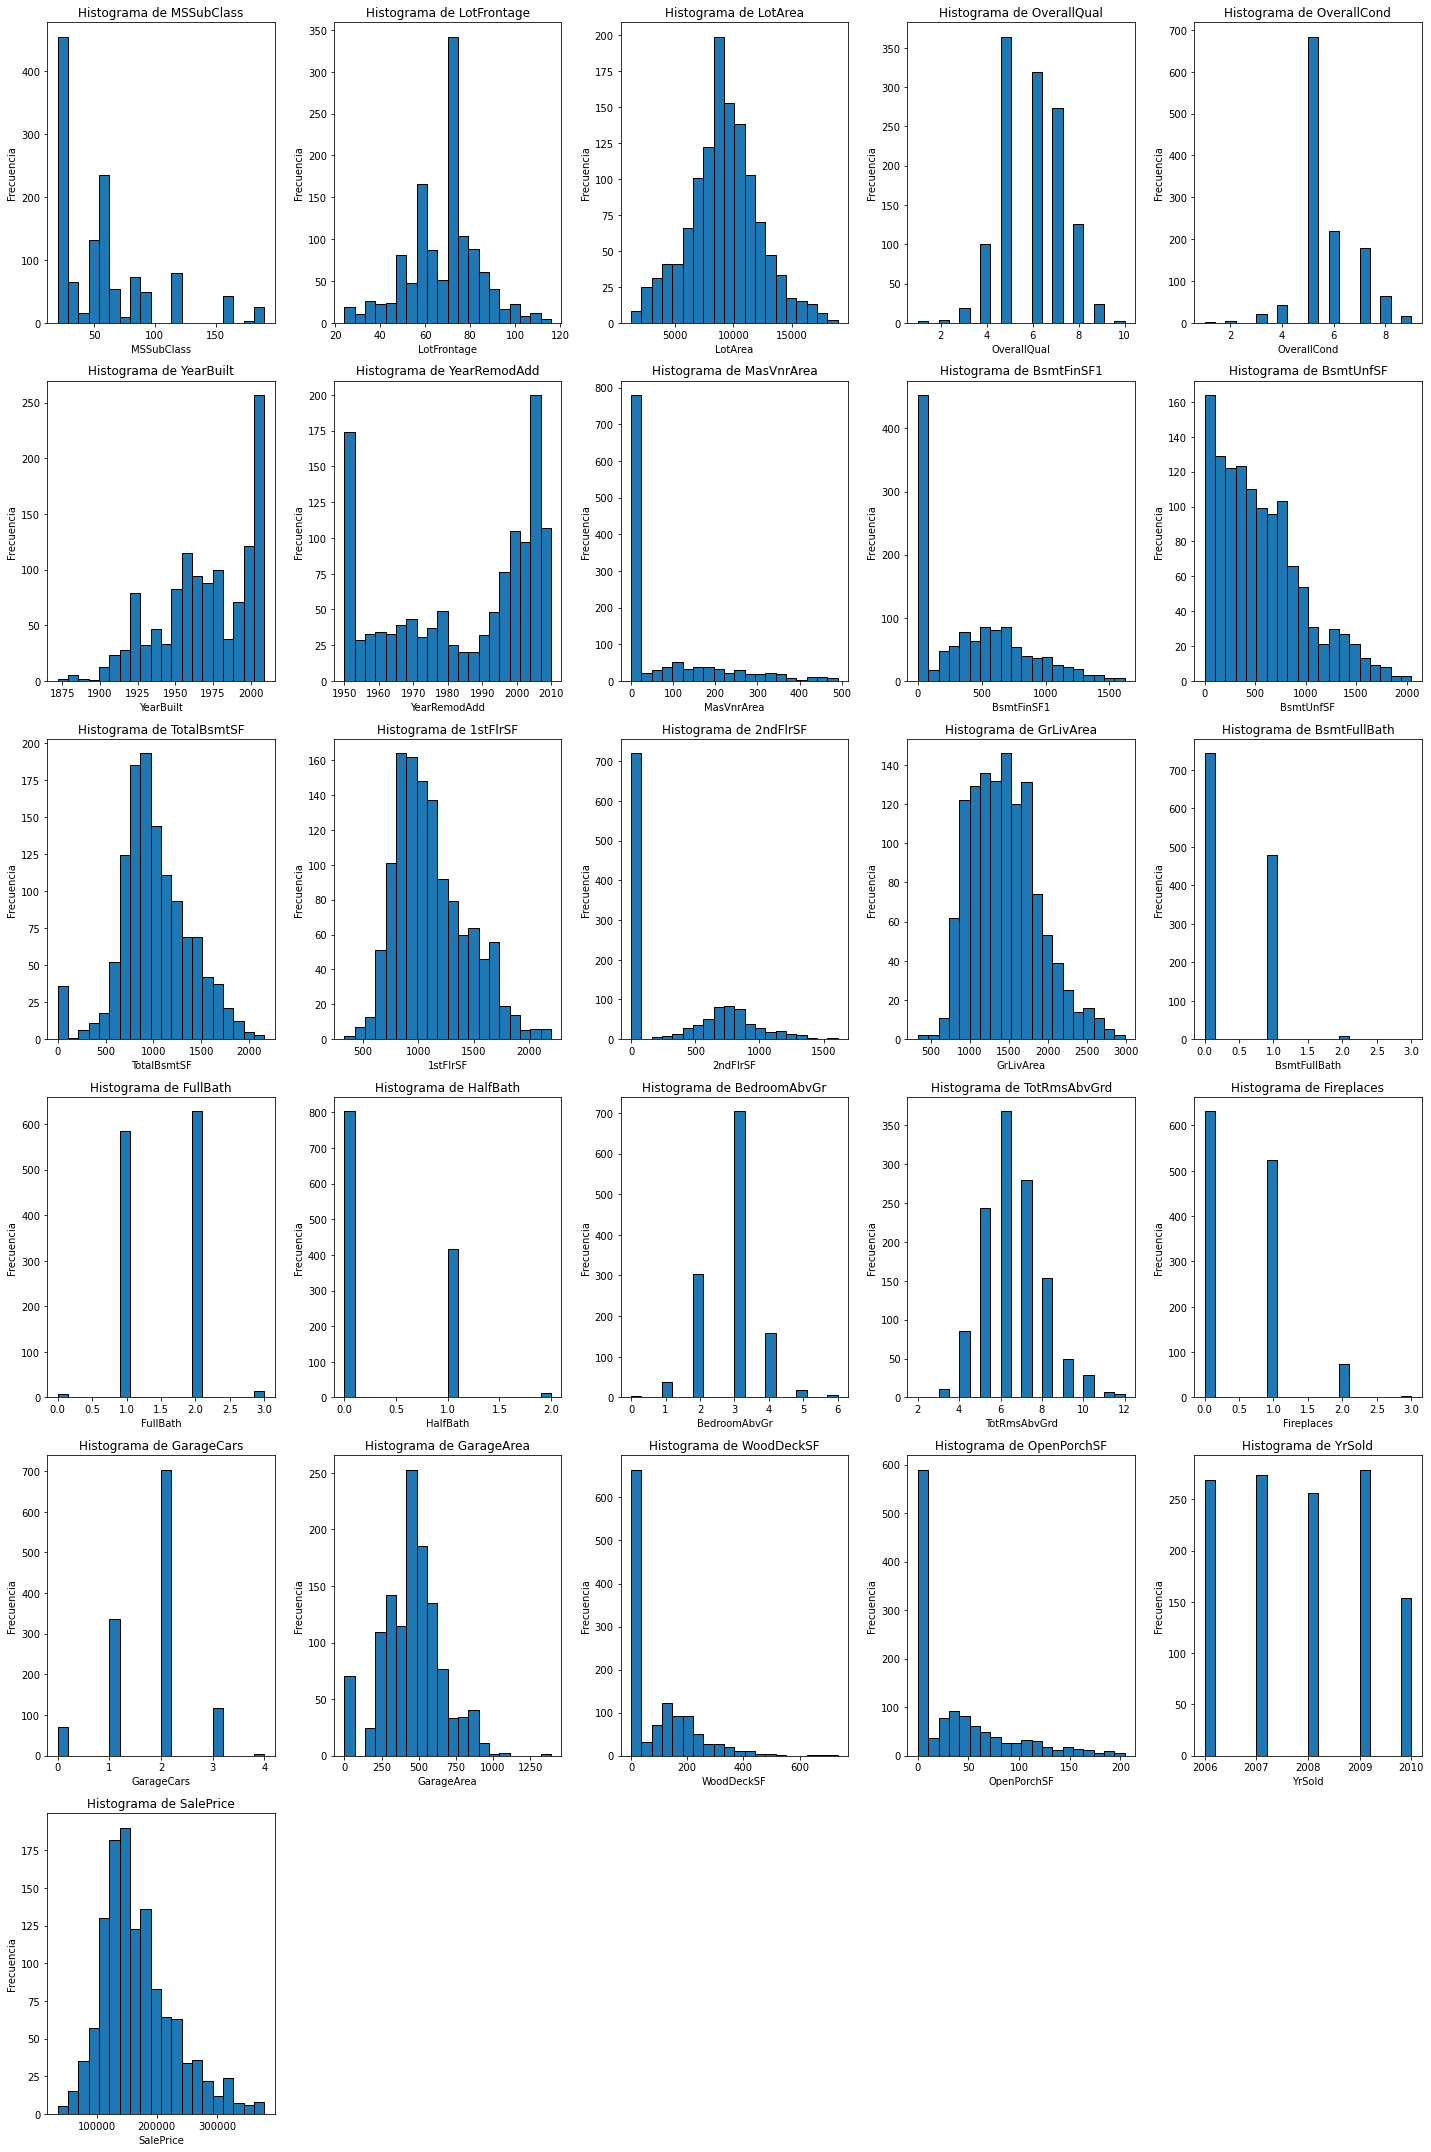

In [419]:
ghistograma(df,getc_numericas(df),5)

Dentro del analisis de variables numericas se puede observar una distribicción normal pero un poco sesgada a la derecha en la variable a pronosticar que seria el SalePrice "Precio de Venta" otra variable que tiene cierta distribucion normal es ToRmsAbvGrd y tambien LotArea que es aparentemente la variable mas normal del modelo. Entre otras la de Garage Area parece ser tambien interesante con cierta normalidad pero de igual manera un poco sesgada a la izquierda al igual que la variable de LotFrontage.
Despúes muchas variables parecen necesitar un tratamiento un poco mas rigido para el tratamiento de outliers debido a que tienen valores muy altos cuando se observa una normalidad en los datos como OpenPorchSF. Esto también se podría solucionar normalizando los datos.

### 5. Análisis Bivariable.

Se realiza una prueba de medias para ver si la media de la variable SalePrice cambia para cada categoría de las variables categoricas.

In [420]:
import pandas as pd
from scipy.stats import f_oneway
def anova_test(df, cat_column, num_column):
    categories = df[cat_column].unique()
    # Extraer datos de la columna numérica para cada categoría
    data_groups = [df[num_column][df[cat_column] == cat].values for cat in categories]
    # Realizar la prueba ANOVA
    f_statistic, p_value = f_oneway(*data_groups)
    return f_statistic, p_value

Este código realiza pruebas de ANOVA para comparar la variable 'SalePrice' en diferentes categorías de cada columna en el DataFrame 'df'. Si encuentra que las diferencias son estadísticamente significativas (valor p < 0.001), agrega el nombre de la columna a una lista llamada 'lista' y finalmente muestra cuántas columnas cumplieron con este criterio.

Originalmente tenemos 29 columnas categoricas

In [421]:
len(getc_cadenas(df))

29

Generamos una lista con las variables categoricas que tienen diferencias significativas para la media del target en cada categoria

In [422]:
lista=[]
for col in getc_cadenas(df):
    f_stat, p_val = anova_test(df, col, 'SalePrice')
    if p_val < 0.001:
        #print(f"La media de 'SalePrice' es estadísticamente diferente entre las categorías de {col}")
        lista.append(col)
print(len(lista))
    

26


Graficamos solo aquellas de la lista

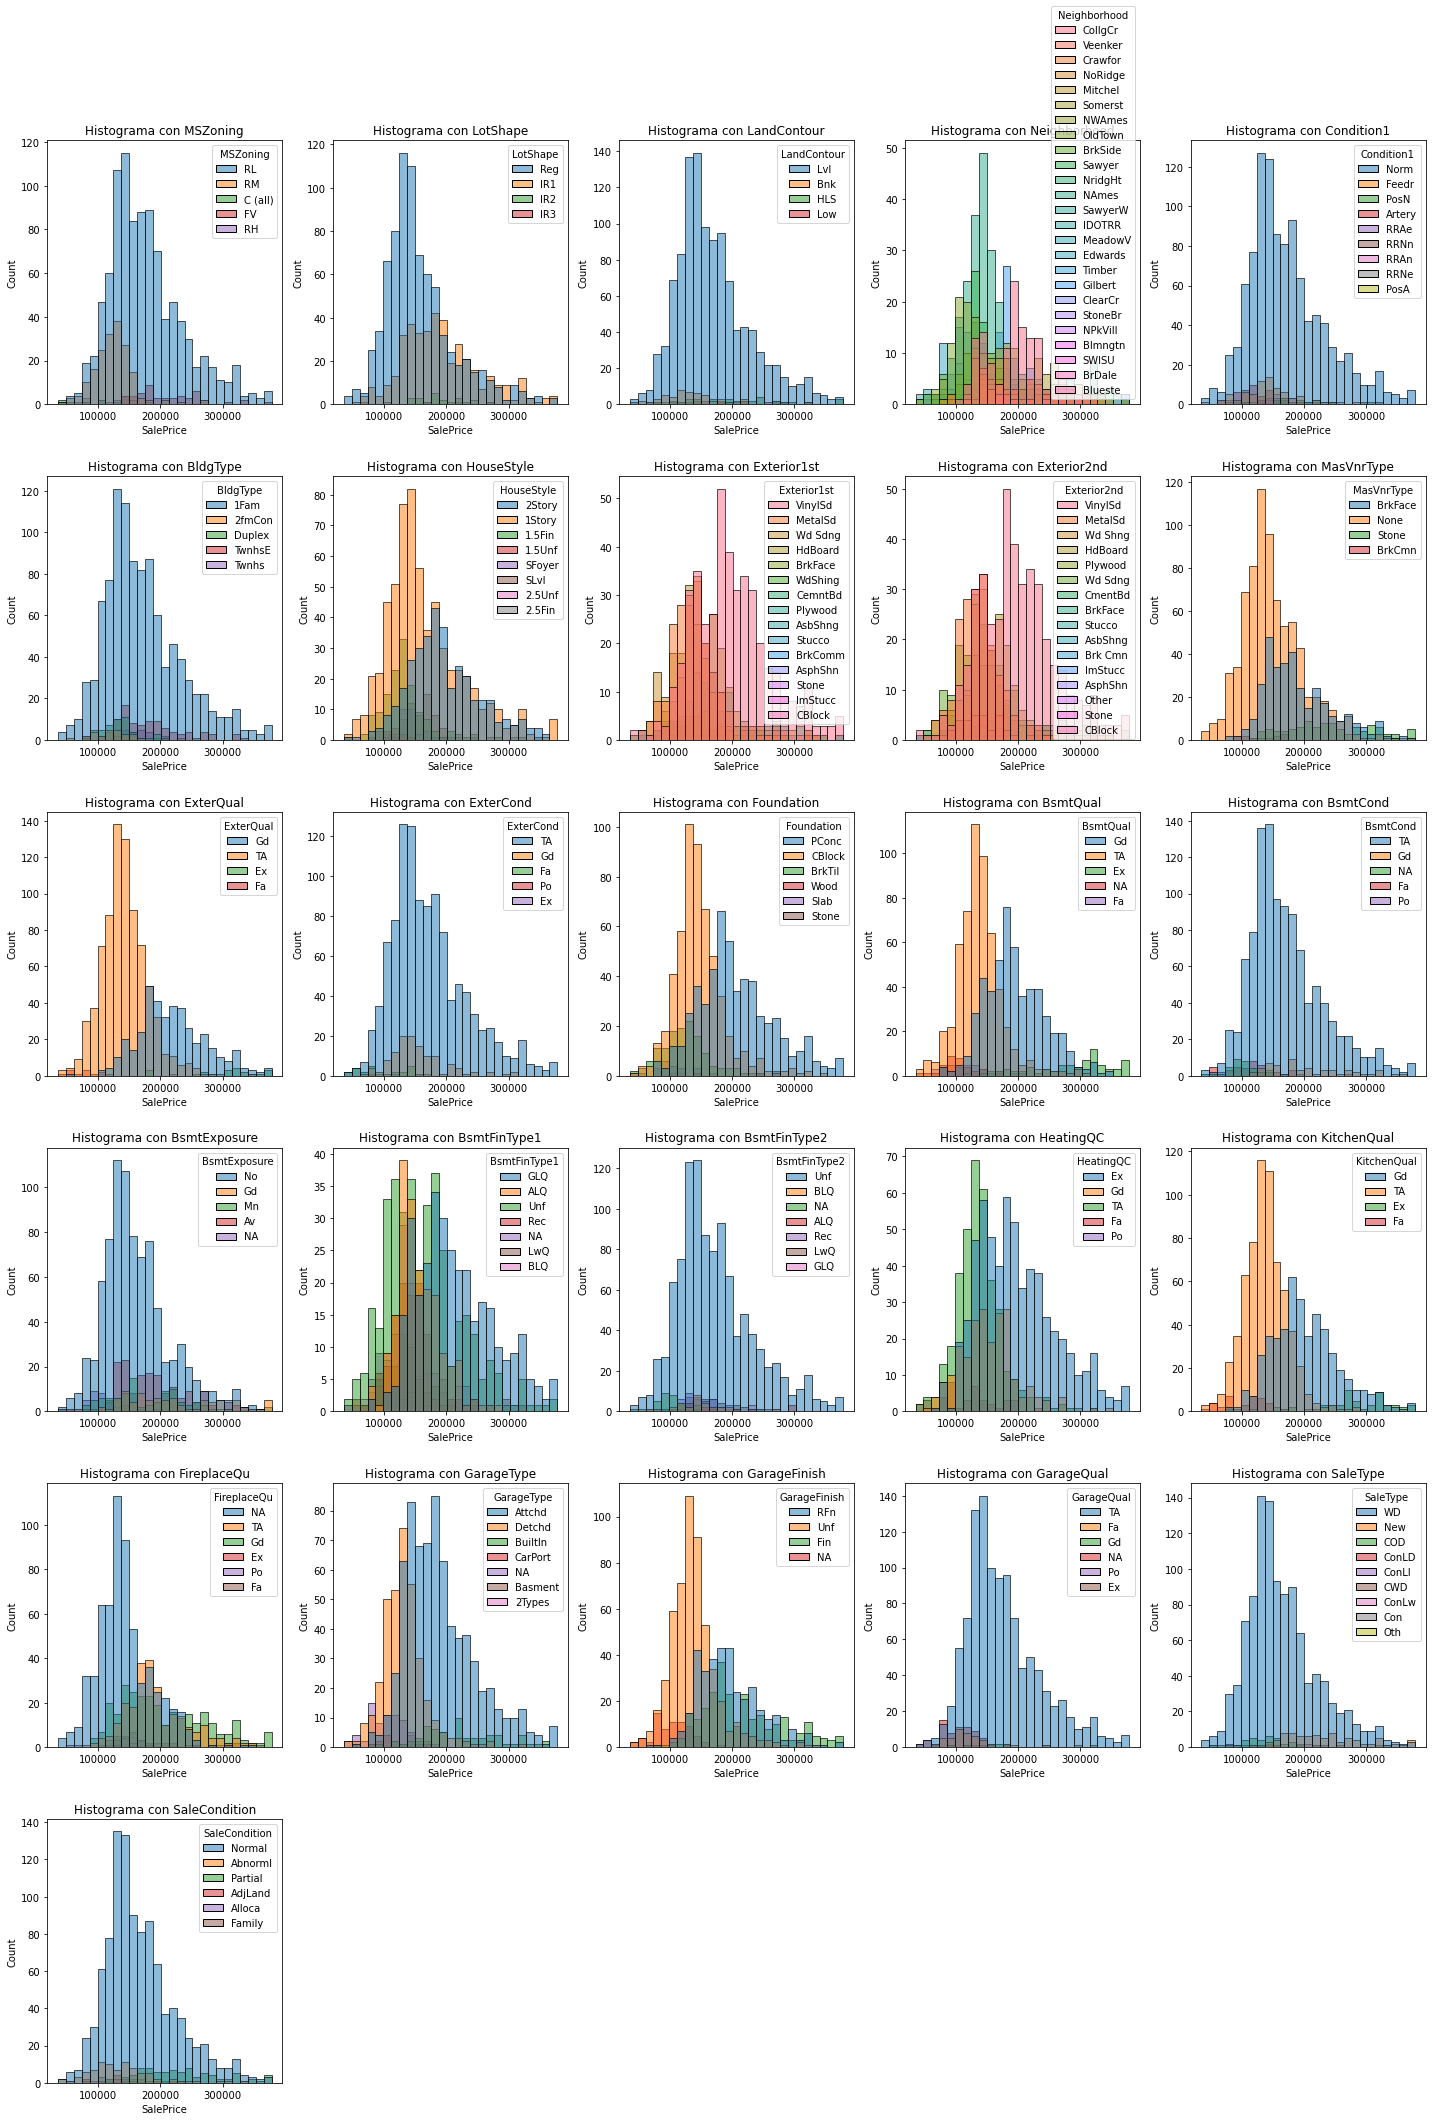

In [423]:
ghistogramahue(df, 'SalePrice' ,lista, 5)

Las variables que tienen mayor similitud con la normalidad de los datos es House Style tomando en cuenta que estos aun son datos sin estandarizar. Otra variable que parece estar bastante similar en los datos y sus valores es Neighborhood lo cual tiene sentido tratandose de que esas variables suelen condicionar mucho el precio. Sin embargo el valor de Garagetype tiene una similitud con excepcion de que esta un poco mas sesgada a la izquierda de la variable de SalePrice.

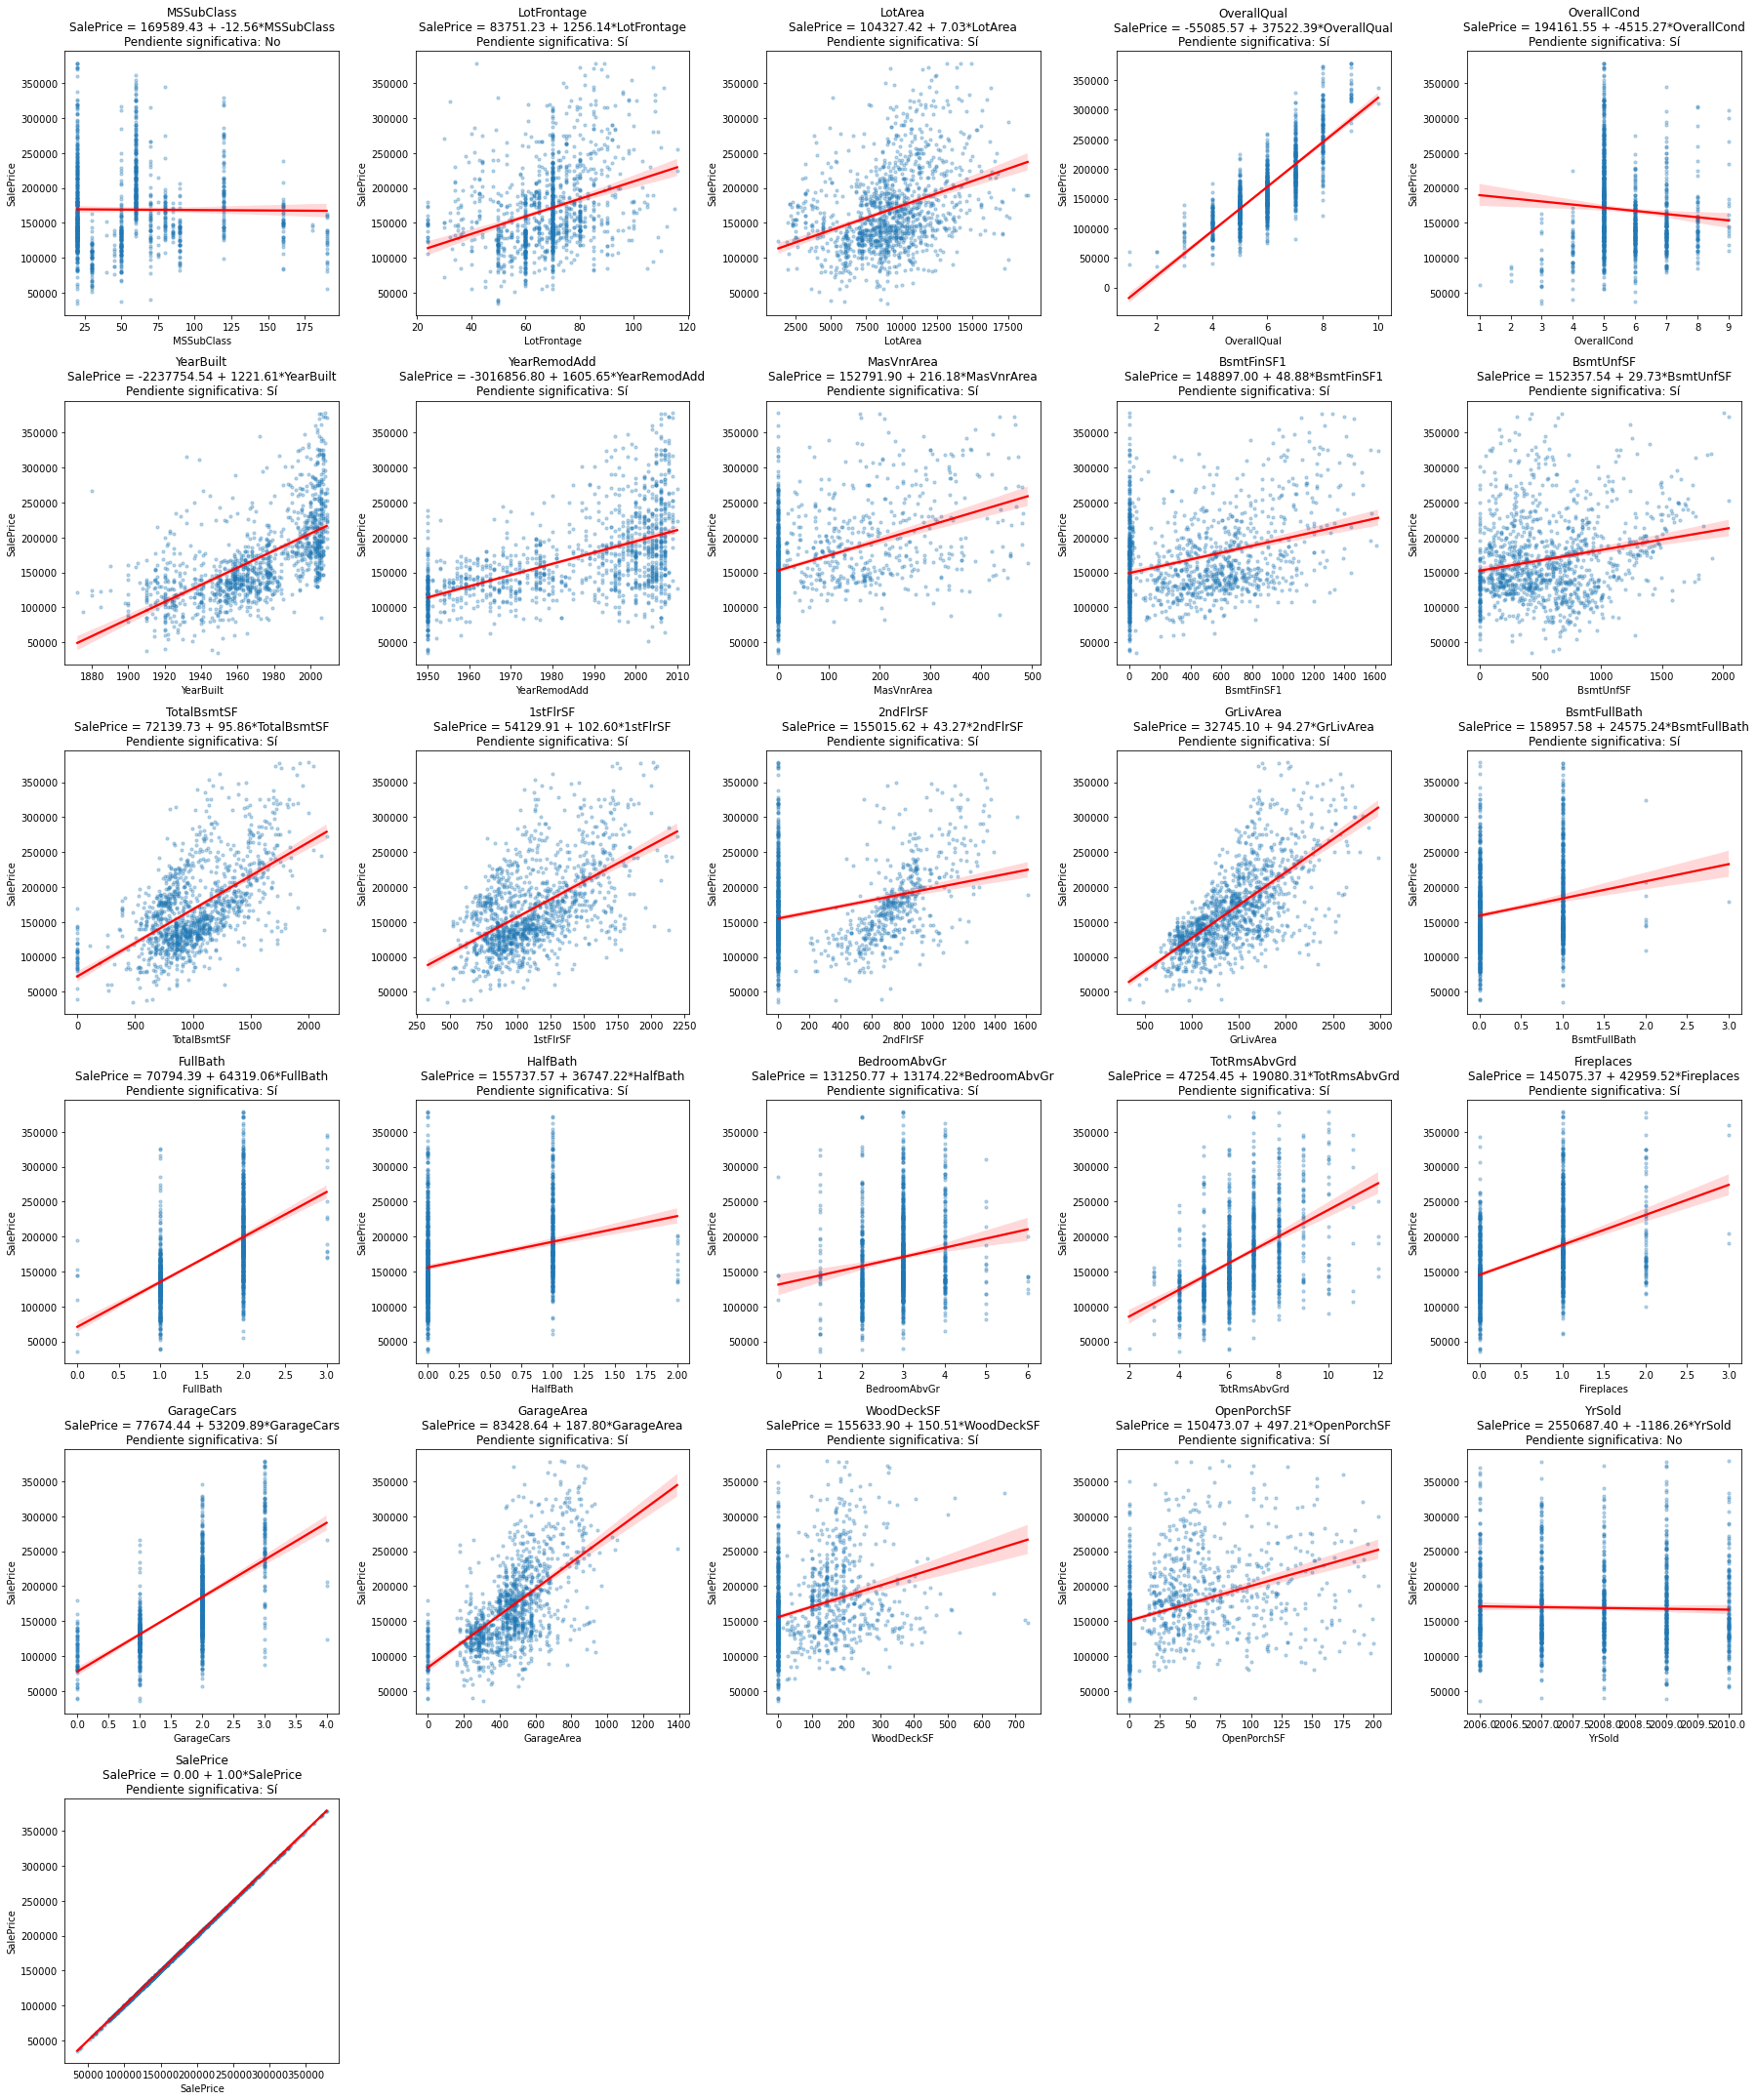

In [424]:
gscatterhue(df, 'SalePrice' ,getc_numericas(df), ncol=5)

Podemos observar que las varaibles de GarageCars, ToRmsAbvgrid y Overall parecen tener una tendencia de correlacion positiva con la variable de SalePrice. Por otro lado las variables de YrSold, OverallCond y MSSubClass no parecen tener una buena linealidad ni correlacion con la variable Precio debido a que la linea es horizontal

### 6. Análisis Multivariable.

Generamos un mapa de calor general con todas las variables

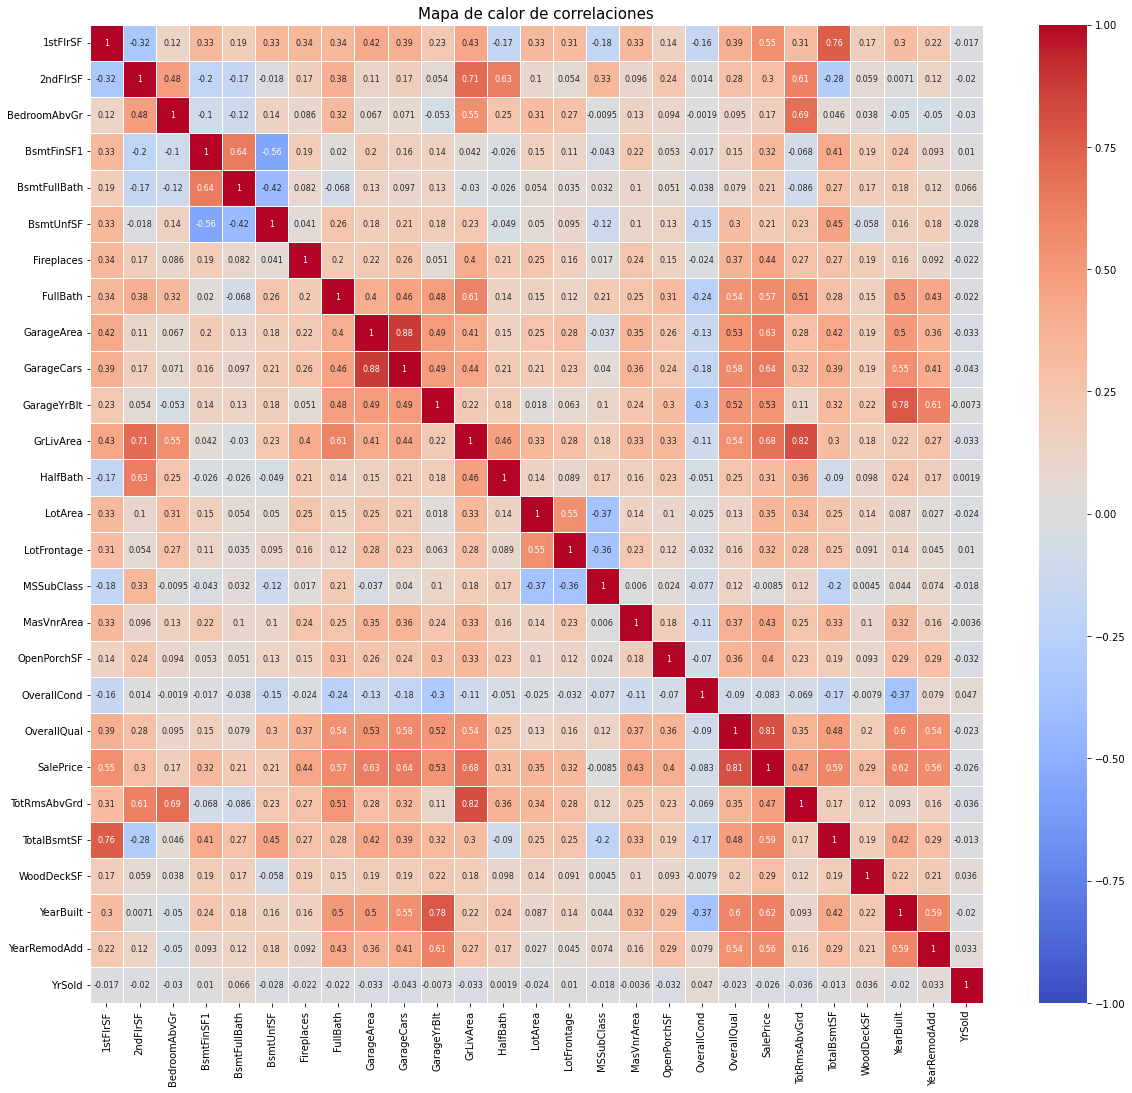

In [425]:
# Calcular la matriz de correlación
correlaciones = df[sorted(df.columns)].corr()

# Crear el mapa de calor con un tamaño más grande
plt.figure(figsize=(20, 18))  # Aumentar el tamaño del gráfico

# Crear el mapa de calor
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=.5, annot_kws={"size": 8})  # Reducir el tamaño de las anotaciones a 8

plt.title('Mapa de calor de correlaciones', fontsize=15)

plt.show()


Encontramos que las variables que tienen alta correlación entre ellas son:
- GrLivArea 2ndFlrSF
- GrLivArea BedroomAbvGr
- GrLivArea FullBath
- HalfBath 2ndFlrSF
- TotalBsmtSF 1stFlrSF

- BsmtFullBath BsmtFinSF1
- BsmtUnfSF BsmtFinSF1
- GarageArea GarageCars
- LotFrontage LotArea
- OverallQual FullBath
- OverallQual GarageArea
- OverallQual GarageCars
- OverallQual GarageYrBlt
- OverallQual GrLivArea
- TotRmsAbvGrd 2ndFlrSF
- TotRmsAbvGrd BedroomAbvGr
- TotRmsAbvGrd FullBath
- TotRmsAbvGrd GrLivArea

- YearBuilt FullBath
- YearBuilt GarageArea
- YearBuilt GarageCars
- YearBuilt GarageYrBlt
- YearBuilt OverallQual
- YearRemodAdd GarageYrBlt
- YearRemodAdd OverallQual
- YearRemodAdd YearBuilt

# 7. Preparación de datos y modelado

In [426]:
len(df.columns)

56

##### One hot encoding

In [376]:
#One hot encoding
def one_hot_encode(df, columnas):
    df_encoded = df.copy()
    for col in columnas:
        dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)
    return df_encoded

##### Normalizacion

In [380]:
#Normalizacion
from sklearn.preprocessing import StandardScaler
def normalize_selected_columns(df, columnas):
    df_normalized = df.copy()
    scaler = StandardScaler()
    df_normalized[columnas] = scaler.fit_transform(df_normalized[columnas])
    return df_normalized

##### Split Train-Test

In [382]:
#Split
from sklearn.model_selection import train_test_split

def custom_train_test_split(df, target, test_size=0.2, random_state=None):
    X = df.drop(columns=target)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

VIF

In [395]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getc_vif_alto(df1):
    # Asumiendo que df es tu DataFrame
    da=df1
    features = getc_numericas(da)
    da[features] = da[features].astype(float)  # Asegura que todas las columnas son flotantes

    # Calcula el VIF para cada característica
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(da[features].values, i) for i in range(da[features].shape[1])]

    columnas_vif_alto=vif_data[vif_data.VIF>=10].Feature.unique()
    return columnas_vif_alto


# 8.  Construcción y evaluación del modelo

In [462]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder


In [473]:
# Selección de modelos
#DF1
df1=one_hot_encode(df, getc_cadenas(df))
df1=normalize_selected_columns(df1, getc_numericas(df1))
print(df1.shape)

#DF2
cbaja_varianza=df1[getc_saturadas(df1,0.9)].columns
calta_varianza=[element for element in df1.columns if element not in getc_saturadas(df1,0.9)]
df2=df1[calta_varianza]
print(df2.shape)

#DF3
df3=df2.drop(list(getc_vif_alto(df2)), axis=1)
print(df3.shape)

#DF4
df4=df1.reset_index(drop=True)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
df_poly = pd.DataFrame(poly.fit_transform(df4[getc_numericas(df4)]), columns=poly.get_feature_names_out(getc_numericas(df4)))
df4 = pd.concat([df4, df_poly.add_suffix('_poly')], axis=1)
#df4=df4.dropna()
print(df4.shape)


(1232, 206)
(1232, 78)
(1232, 75)
(1232, 583)


In [ ]:
def linear_regression_metrics(X_train, X_test, y_train, y_test):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    # Predecir valores con el conjunto de prueba
    y_pred = lm.predict(X_test)
    
    # Criterios
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calcular BIC con statsmodels
    X_with_const = sm.add_constant(X_train)  # Añadir una constante para la intersección
    model_sm = sm.OLS(y_train, X_with_const).fit()
    bic = model_sm.bic
    
    return r2, rmse, mae, bic

In [450]:
def ridge_regression_metrics(X_train, X_test, y_train, y_test):
    # Crear el modelo Ridge
    ridge = Ridge(alpha=1.0)  # alpha es el parámetro de regularización. Ajusta este valor según sea necesario.
    ridge.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = ridge.predict(X_test)

    # Evaluar el rendimiento
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, mae



In [449]:
def lasso_regression_metrics(X_train, X_test, y_train, y_test):
    # Crear el modelo Lasso
    lasso = Lasso(alpha=0.001)  # alpha es el parámetro de regularización. Ajusta este valor según sea necesario.
    lasso.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = lasso.predict(X_test)

    # Evaluar el rendimiento
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, mae


In [448]:
def elasticnet_regression_metrics(X_train, X_test, y_train, y_test):
    # Crear el modelo ElasticNet
    elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5)  # alpha es el parámetro de regularización y l1_ratio es el mix entre L1 y L2. 
    # l1_ratio=1 es Lasso y l1_ratio=0 es Ridge.
    elastic_net.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = elastic_net.predict(X_test)

    # Evaluar el rendimiento
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, mae


#### Regresion Lineal

In [436]:
# Modelo 1 
X_train, X_test, y_train, y_test=custom_train_test_split(df1, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae, bic = linear_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"BIC: {bic}")

R^2: 0.9087881513807086
RMSE: 0.09017011198593464
MAE: 0.21485539640779933
BIC: 1388.4319649304673


In [437]:
# Modelo 2 
X_train, X_test, y_train, y_test=custom_train_test_split(df2, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae, bic = linear_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"BIC: {bic}")

R^2: 0.8935411448355762
RMSE: 0.10524298144791903
MAE: 0.24962718367344475
BIC: 961.5144684089681


In [438]:
# Modelo 
X_train, X_test, y_train, y_test=custom_train_test_split(df3, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae, bic = linear_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"BIC: {bic}")

R^2: 0.8776326762408557
RMSE: 0.12096975835711199
MAE: 0.2630876812433027
BIC: 1112.8474442543593


In [474]:
# Modelo 
X_train, X_test, y_train, y_test=custom_train_test_split(df4, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae, bic = linear_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"BIC: {bic}")

R^2: 1.0
RMSE: 2.907645821689105e-28
MAE: 1.2676109037828287e-14
BIC: -49902.762595631175


#### Regresion Ridge

In [452]:
# Modelo 1 
X_train, X_test, y_train, y_test=custom_train_test_split(df1, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = ridge_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.9203935171952536
RMSE: 0.07869729183180019
MAE: 0.20498375702855612


In [453]:
# Modelo 2
X_train, X_test, y_train, y_test=custom_train_test_split(df2, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = ridge_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.8937146070839828
RMSE: 0.10507150032347178
MAE: 0.24926857146451128


In [454]:
# Modelo 3
X_train, X_test, y_train, y_test=custom_train_test_split(df3, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = ridge_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.8776413317372012
RMSE: 0.12096120171577006
MAE: 0.2629934355967348


In [475]:
# Modelo 4
X_train, X_test, y_train, y_test=custom_train_test_split(df4, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = ridge_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.9997130375454182
RMSE: 0.0002836850371644545
MAE: 0.012057465106547677


#### Regresión Lasso

In [455]:
# Modelo 1 
X_train, X_test, y_train, y_test=custom_train_test_split(df1, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = lasso_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.9229007844287868
RMSE: 0.0762186602653029
MAE: 0.2054287407028638


In [456]:
# Modelo 2
X_train, X_test, y_train, y_test=custom_train_test_split(df2, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = lasso_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.8951200953074547
RMSE: 0.10368206427515365
MAE: 0.24781489651041988


In [457]:
# Modelo 3
X_train, X_test, y_train, y_test=custom_train_test_split(df3, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = lasso_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.8780625119488626
RMSE: 0.12054483183152082
MAE: 0.2635855388997729


In [476]:
# Modelo 4
X_train, X_test, y_train, y_test=custom_train_test_split(df4, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = lasso_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.9999987160841634
RMSE: 1.2692521478128795e-06
MAE: 0.0008640771680316475


#### Regresión ElasticNet

In [458]:
# Modelo 1 
X_train, X_test, y_train, y_test=custom_train_test_split(df1, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = elasticnet_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.9229770415039144
RMSE: 0.07614327412733884
MAE: 0.20451613410786013


In [459]:
# Modelo 2
X_train, X_test, y_train, y_test=custom_train_test_split(df2, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = elasticnet_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.8944362797353307
RMSE: 0.10435806994381967
MAE: 0.24870660489378305


In [460]:
# Modelo 3
X_train, X_test, y_train, y_test=custom_train_test_split(df3, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = elasticnet_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.8778439738696553
RMSE: 0.12076087397268566
MAE: 0.2630992199717596


In [477]:
# Modelo 4
X_train, X_test, y_train, y_test=custom_train_test_split(df4, 'SalePrice', test_size=0.2, random_state=56)
r2, rmse, mae = elasticnet_regression_metrics(X_train, X_test, y_train, y_test)
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R^2: 0.9999979367877024
RMSE: 2.039648211689127e-06
MAE: 0.0010397991573779114


Tabla comparativa

In [482]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Función genérica para regresiones regularizadas
def perform_regression(model, params, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    
    train_r2 = best_model.score(X_train, y_train)
    test_r2 = best_model.score(X_test, y_test)
    
    y_pred = best_model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    
    optimal_lambda = grid.best_params_['alpha']
    
    return {
        'Optimal Lambda Value': optimal_lambda,
        'R2 Score Train': train_r2,
        'R2 Test Score': test_r2,
        'RMSE Test': rmse_test
    }

def regression_summary(df, target):
    X_train, X_test, y_train, y_test = custom_train_test_split(df, target, test_size=0.2, random_state=56)
    
    # Definiendo rangos para el parámetro lambda (alpha)
    alphas = np.logspace(-6, 6, 13)
    params = {'alpha': alphas}
    
    ridge_results = perform_regression(Ridge(), params, X_train, y_train, X_test, y_test)
    lasso_results = perform_regression(Lasso(), params, X_train, y_train, X_test, y_test)
    elastic_results = perform_regression(ElasticNet(), params, X_train, y_train, X_test, y_test)
    
    df = pd.DataFrame([ridge_results, lasso_results, elastic_results], 
                      index=['Ridge Regression', 'Lasso Regression', 'ElasticNet Regression'])
    
    return df




In [483]:
# Tabla Comparativa
regression_summary(df1, 'SalePrice')

,Optimal Lambda Value,R2 Score Train,R2 Test Score,RMSE Test
Ridge Regression,10.00,0.93,0.92,0.28
Lasso Regression,0.00,0.93,0.92,0.28
ElasticNet Regression,0.00,0.93,0.92,0.28


In [491]:
# Variables mas importantes
X_train, X_test, y_train, y_test=custom_train_test_split(df1, 'SalePrice', test_size=0.2, random_state=56)

# Ajustando el modelo Ridge con el lambda óptimo
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

# Obteniendo los coeficientes
coef = pd.Series(ridge.coef_, index=X_train.columns)

# Ordenando los coeficientes en valor absoluto en orden descendente
coef.abs().sort_values(ascending=False).head(20)



BsmtQual_Gd            0.22
Neighborhood_StoneBr   0.21
KitchenQual_TA         0.21
Neighborhood_Crawfor   0.20
KitchenQual_Gd         0.20
OverallQual            0.20
BsmtExposure_Gd        0.19
2ndFlrSF               0.17
GrLivArea              0.17
Neighborhood_NridgHt   0.17
Neighborhood_NoRidge   0.17
TotalBsmtSF            0.16
BsmtQual_TA            0.16
Condition1_RRAe        0.15
KitchenQual_Fa         0.15
MSZoning_FV            0.15
YearBuilt              0.14
Neighborhood_Edwards   0.13
Exterior1st_BrkFace    0.13
Condition1_PosN        0.12
dtype: float64

# 9. Conclusiones

Probando distintos modelos y aplicando las técnicas de Ridge, Lasso y Elastic Net se encontro un modelo con un R2 en el grupo de test de 92%. Donde las 20 variables más importantes son:

In [492]:
coef.abs().sort_values(ascending=False).head(20)

BsmtQual_Gd            0.22
Neighborhood_StoneBr   0.21
KitchenQual_TA         0.21
Neighborhood_Crawfor   0.20
KitchenQual_Gd         0.20
OverallQual            0.20
BsmtExposure_Gd        0.19
2ndFlrSF               0.17
GrLivArea              0.17
Neighborhood_NridgHt   0.17
Neighborhood_NoRidge   0.17
TotalBsmtSF            0.16
BsmtQual_TA            0.16
Condition1_RRAe        0.15
KitchenQual_Fa         0.15
MSZoning_FV            0.15
YearBuilt              0.14
Neighborhood_Edwards   0.13
Exterior1st_BrkFace    0.13
Condition1_PosN        0.12
dtype: float64